In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
d = pd.read_csv('covid-19-data/us-counties.csv')

counties = [
    # county, state, population
    # all populations based on Wikipedia 2020 estimates
    ('New York City', 'New York', 8398748),
    ('Los Angeles', 'California', 10105518),
    ('Cook', 'Illinois', 5150233), # Chicago
    ('King', 'Washington', 753675), # Seattle
    ('San Francisco', 'California', 881549),
    ('San Diego', 'California', 3338330),
]

county_tot, county_by_pop = [], []
for c in counties:
    county, state, pop = c
    colname = f"{county}, {state}"
    c_filter = d.county.eq(county) & d.state.eq(state)
    county_data = d[c_filter].set_index('date').filter(items=['cases'])
    county_data = county_data.rename(columns={"cases": colname})
    
    by_pop = county_data[colname] / (pop / 1000)
    county_tot.append(county_data)
    county_by_pop.append(by_pop)

d_tot = pd.concat(county_tot, axis=1).sort_index()
d_by_pop = pd.concat(county_by_pop, axis=1).sort_index()
d_tot

,"New York City, New York","Los Angeles, California","Cook, Illinois","King, Washington","San Francisco, California","San Diego, California"
2020-01-24,NaN,NaN,1,NaN,NaN,NaN
2020-01-25,NaN,NaN,1,NaN,NaN,NaN
2020-01-26,NaN,1.0,1,NaN,NaN,NaN
2020-01-27,NaN,1.0,1,NaN,NaN,NaN
2020-01-28,NaN,1.0,1,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-05-24,202931.0,44988.0,72010,7821.0,2370.0,6764.0
2020-05-25,203569.0,46018.0,73097,7881.0,2389.0,6860.0
2020-05-26,204111.0,47822.0,73819,7898.0,2402.0,6945.0
2020-05-27,204781.0,48700.0,74521,7933.0,2411.0,7046.0


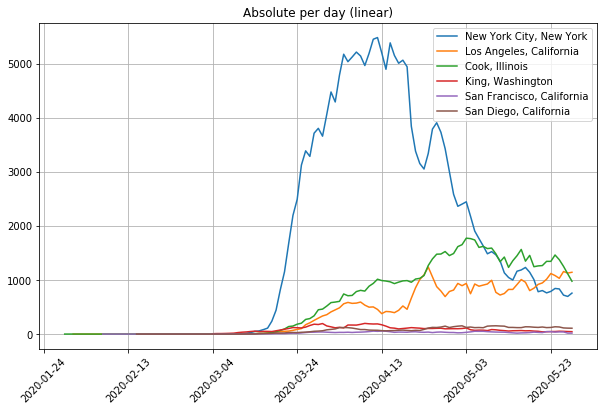

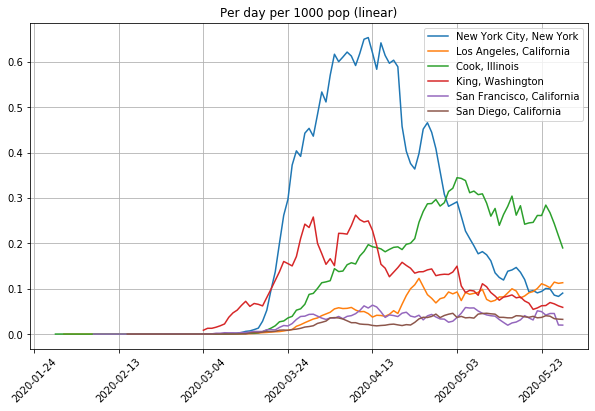

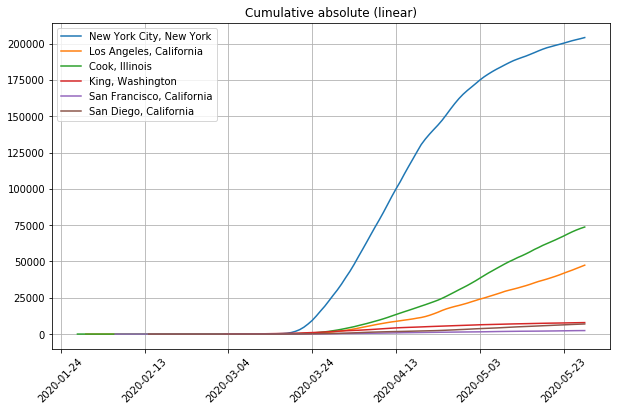

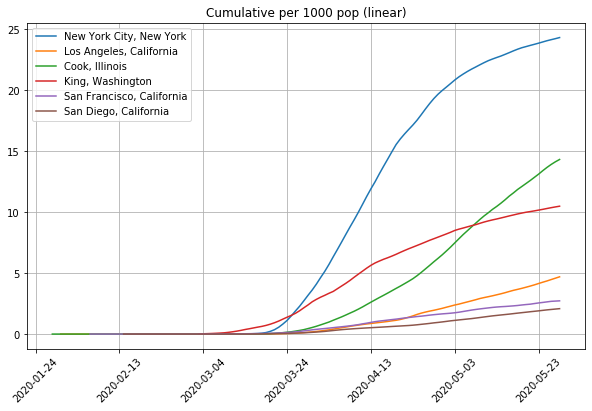

In [217]:
logy = False
rolling = 5 # number of days
scale = "log" if logy else "linear"
figsize = (10, 6)
if rolling > 1:
    d_tot = d_tot.rolling(window=rolling).mean()
    d_by_pop = d_by_pop.rolling(window=rolling).mean()

d_tot.diff().plot(figsize=figsize, rot=45, grid=True, logy=logy, title=f"Absolute per day ({scale})")
d_by_pop.diff().plot(figsize=figsize, rot=45, grid=True, logy=logy, title=f"Per day per 1000 pop ({scale})")
d_tot.plot(figsize=figsize, rot=45, grid=True, logy=logy, title=f"Cumulative absolute ({scale})")
d_by_pop.plot(figsize=figsize, rot=45, grid=True, logy=logy, title=f"Cumulative per 1000 pop ({scale})")